In [1]:
import os
import sys
from pathlib import Path
from time import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from autoeq.frequency_response import FrequencyResponse
from autoeq.peq import LowShelf, Peaking, HighShelf

In [2]:
DIR_PATH = Path().resolve()
AUTOEQ_PATH = DIR_PATH.parent.parent.joinpath('AutoEq')
DIR_PATH.joinpath('out').mkdir(parents=True, exist_ok=True)

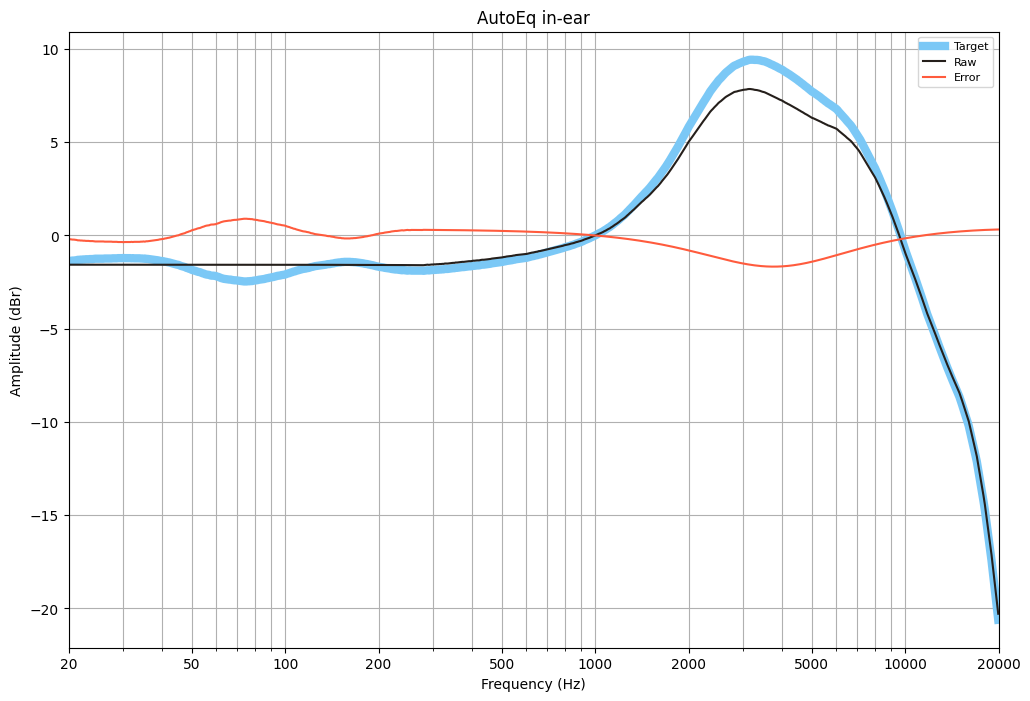

In [49]:
harman = FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'Harman in-ear 2019 without bass.csv'))
fr = harman.copy()

#low_shelf = LowShelf(fr.frequency, 44100, fc=105, q=0.7, gain=9)
#fr.raw -= low_shelf.fr
ix1 = np.argmin(np.abs(fr.frequency - 200))
ix2 = np.argmin(np.abs(fr.frequency - 300))
floor_ix = np.argmin(fr.raw[ix1:ix2]) + ix1
fr.raw[:floor_ix] = fr.raw[floor_ix]

ear_gain_cut = Peaking(fr.frequency, 44100, fc=3766, q=0.63, gain=-2)
fr.raw += ear_degain.fr

fr.center()
fr.compensate(harman, min_mean_error=False)
fr.name = 'AutoEq in-ear'

fr.plot(show_fig=False)
plt.show()

fr.reset(error=True, target=True)
fr.write_csv(DIR_PATH.joinpath('AutoEq in-ear.csv'))